<a href="https://colab.research.google.com/github/FuManWai/Web_Scraping_Booking.com/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [274]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

Scraping hotel data from Booking.com.

In [275]:
hotels_data = []
for i in range(0, 200, 25):

  # Make the HTTP request
  url = f'https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaCeIAQGYAQm4AQfIAQzYAQHoAQGIAgGoAgO4ApqehaoGwAIB0gIkZjhlNTRjOGQtNzc5YS00M2Q0LWEzYWQtNGZlNDIyNGRlOGYz2AIF4AIB&sid=6404e3f02159587f4ed1219ddbc14046&aid=304142&ss=Toronto&ssne=Toronto&ssne_untouched=Toronto&efdco=1&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-574890&dest_type=city&checkin=2023-11-11&checkout=2023-11-12&group_adults=1&no_rooms=1&group_children=0&offset={i}'
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}
  response  = requests.get(url, headers=headers)

  # Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

  # Find all the hotel elements in the HTML document
  hotels = soup.find_all('div', {'data-testid': 'property-card'})

  for hotel in hotels:
      # Extract the hotel name
      name_element = hotel.find('div', {'data-testid': 'title'})
      name = name_element.text.strip()

      # Extract the hotel location
      location_element = hotel.find('span', {'data-testid': 'address'})
      location = location_element.text.strip()

      # Extract the hotel price
      price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
      price = price_element.text.strip()

      # Extract the hotel rating
      rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})

      if rating_element is not None:
        rating = rating_element.text.strip()
      else:
        rating = "No Rating"

      # Extract the hotel review
      review_element = hotel.find('div', {'class': 'abf093bdfe f45d8e4c32 d935416c47'})

      if review_element is not None:
        review = review_element.text.strip()
      else:
        review = "No Review"

      # Append hotes_data with info about hotel
      hotels_data.append({
        'Name': name,
        'Location': location,
        'Price': price,
        'Rating': rating,
        'Review': review
      })

Converts data into a Pandas DataFrame and saves it to a CSV file.

In [276]:
hotels = pd.DataFrame(hotels_data)
hotels.head()

,Name,Location,Price,Rating,Review
0,Samesun Toronto,"Downtown Toronto, Toronto",US$66,7.4,"2,121 reviews"
1,Chelsea Hotel Toronto,"Downtown Toronto, Toronto",US$135,7.1,"6,417 reviews"
2,The Clarence Park,"Downtown Toronto, Toronto",US$40,7.7,"3,541 reviews"
3,DoubleTree by Hilton Toronto Downtown,"Downtown Toronto, Toronto",US$182,7.6,"5,162 reviews"
4,One King West Hotel and Residence,"Financial District, Toronto",US$199,8.4,"11,058 reviews"


In [277]:
hotels.to_csv('hotels.csv', header=True, index=False)

Finding the top 5 hotels with the most reviews

In [278]:
# Filter out hotels with 'No Review'
filtered_hotels_data = [hotel for hotel in hotels_data if hotel['Review'] != 'No Review']

# Convert review strings to numeric values
numeric_reviews = []

for hotel in filtered_hotels_data:
    review_str = hotel['Review']
    numeric_value = int(review_str.split()[0].replace(',', ''))
    numeric_reviews.append(numeric_value)

# Add the numeric review values to the filtered_hotels_data list
for i, hotel in enumerate(filtered_hotels_data):
    hotel['NumericReview'] = numeric_reviews[i]

# Sort the hotels based on the numeric review values
sorted_hotels = sorted(filtered_hotels_data, key=lambda hotel: hotel['NumericReview'], reverse=True)

# Display the top 5 hotels with the most reviews
top_n = 5
top_hotels = sorted_hotels[:top_n]

# Print the top hotels and their review counts
print(f"Top {top_n} Hotels by Number of Reviews:")
for i, hotel in enumerate(top_hotels, start=1):
    print(f"{i}. {hotel['Name']} - {hotel['Review']}")

Top 5 Hotels by Number of Reviews:
1. One King West Hotel and Residence - 11,058 reviews
2. Chelsea Hotel Toronto - 6,417 reviews
3. DoubleTree by Hilton Toronto Downtown - 5,162 reviews
4. Town Inn Suites Hotel - 4,124 reviews
5. The Clarence Park - 3,541 reviews


Creating a histogram to visualize the distribution of hotel prices

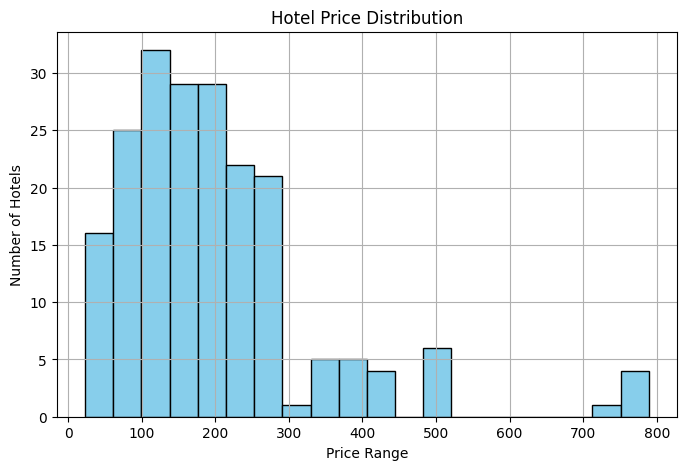

Total Number of Hotels: 200
Average Price: $201.03
Minimum Price: $23.00
Maximum Price: $789.00


In [279]:
# Extract prices from the data
prices = [hotel['Price'] for hotel in hotels_data]

# Function to convert a price string to a numeric value
def extract_price_numeric(price_str):
    # Remove currency symbols, commas, or any other non-numeric characters
    price_cleaned = price_str.replace('US$', '').replace(',', '').strip()
    try:
        return float(price_cleaned)
    except ValueError:
        return None

# Convert prices to numeric values
numeric_prices = [extract_price_numeric(price) for price in prices]

# Filter out None values (prices that couldn't be converted)
numeric_prices = [price for price in numeric_prices if price is not None]

# Calculate statistics
average_price = np.mean(numeric_prices)
min_price = min(numeric_prices)
max_price = max(numeric_prices)
total_hotels = len(numeric_prices)

# Create a histogram of price distribution
plt.figure(figsize=(8, 5))
plt.hist(numeric_prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Hotel Price Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Hotels')
plt.grid(True)
plt.show()

# Display the results
print(f"Total Number of Hotels: {total_hotels}")
print(f"Average Price: ${average_price:.2f}")
print(f"Minimum Price: ${min_price:.2f}")
print(f"Maximum Price: ${max_price:.2f}")

Creating a box plot to visualize the distribution of ratings. It calculates quartiles and the median, also the average, highest, and lowest ratings.


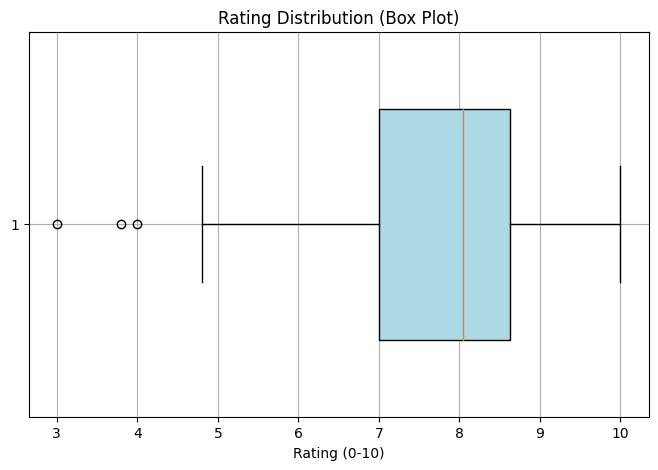

Q1 (25th Percentile): 7.00
Median (50th Percentile): 8.05
Q3 (75th Percentile): 8.62
Average Rating: 6.8
Highest Rating: 10.0
Lowest Rating: 3.0


In [280]:
# Filter out hotels with 'No Rating'
filtered_ratings = [float(hotel['Rating']) for hotel in filtered_hotels_data if hotel['Rating'] != 'No Rating']

# Create a box plot
plt.figure(figsize=(8, 5))
box = plt.boxplot(filtered_ratings, vert=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Rating Distribution (Box Plot)')
plt.xlabel('Rating (0-10)')
plt.grid(True)

# Display the box plot
plt.show()

# Calculate quartiles and median
quartiles = np.percentile(filtered_ratings, [25, 50, 75])
# Calculate average, max and min
average_rating = round(sum(ratings) / len(ratings), 1)
highest_rating = max(ratings)
lowest_rating = min(filtered_ratings)

# Print quartile and median values below the plot
print(f'Q1 (25th Percentile): {quartiles[0]:.2f}')
print(f'Median (50th Percentile): {quartiles[1]:.2f}')
print(f'Q3 (75th Percentile): {quartiles[2]:.2f}')
print(f"Average Rating: {average_rating:.1f}")
print(f"Highest Rating: {highest_rating}")
print(f"Lowest Rating: {lowest_rating if lowest_rating != -1 else 'No Rating'}")